In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob



In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/training'

valid_path = '/content/drive/MyDrive/evaluation'


In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in inception.layers:
  layer.trainable = False

folders = glob('/content/drive/MyDrive/training/*')
folders

['/content/drive/MyDrive/training/Rice',
 '/content/drive/MyDrive/training/Meat',
 '/content/drive/MyDrive/training/Seafood',
 '/content/drive/MyDrive/training/Dessert',
 '/content/drive/MyDrive/training/Vegetable-Fruit',
 '/content/drive/MyDrive/training/Fried food',
 '/content/drive/MyDrive/training/Egg',
 '/content/drive/MyDrive/training/Soup',
 '/content/drive/MyDrive/training/Noodles-Pasta',
 '/content/drive/MyDrive/training/Dairy product',
 '/content/drive/MyDrive/training/Bread']

In [ ]:
x = Flatten()(inception.output)

prediction = Dense(len(folders), activation='softmax')(x)
model=Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/training',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/evaluation',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)


Found 9896 images belonging to 11 classes.
Found 3377 images belonging to 11 classes.


In [ ]:
r = model.fit( training_set, validation_data=test_set, epochs=1, steps_per_epoch=len(training_set), validation_steps=len(test_set) )

619/619 [==============================] - 752s 1s/step - loss: 4.3450 - accuracy: 0.8200 - val_loss: 7.0145 - val_accuracy: 0.7619


In [ ]:
test_loss, test_accuracy = model.evaluate(test_set)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

212/212 [==============================] - 25s 119ms/step - loss: 7.0145 - accuracy: 0.7619
Test Loss: 7.014521598815918
Test Accuracy: 0.761918842792511


In [ ]:
predictions = model.predict(test_set)
class_labels = list(test_set.class_indices.keys())

212/212 [==============================] - 25s 112ms/step


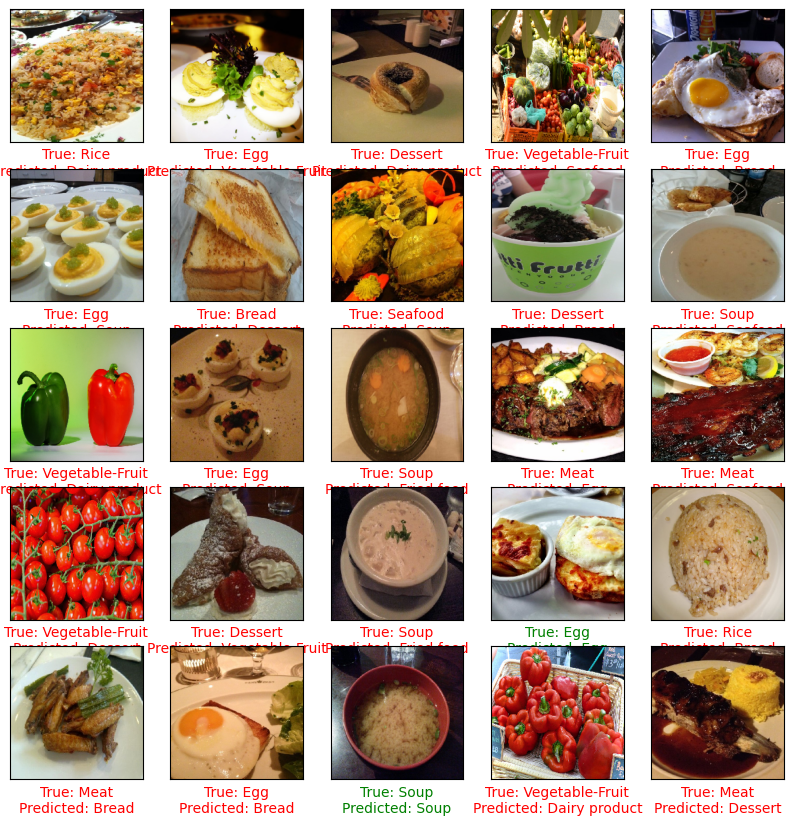

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
num_images_to_visualize = 25
ran_indices = random.sample(range(len(test_set)), num_images_to_visualize)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(ran_indices):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_set[idx][0][0], cmap=plt.cm.binary)
    true_label = class_labels[np.argmax(test_set[idx][1])]
    predicted_label = class_labels[np.argmax(predictions[idx])]
    if true_label == predicted_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"True: {true_label}\nPredicted: {predicted_label}", color=color)
plt.show()
